<a href="https://colab.research.google.com/github/SojeongShin/NLP_2023/blob/main/12_2_RNN_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [자연어처리]
# 12주차(12-2). RNN 이해하기(3)

# 202001581 신소정 <- 본인의 학번, 이름으로 변경하여 제출
* **모든 셀 실행** 후 제출하시기 바랍니다.
* **실습 (12-2)**이 있습니다. (제출 기한: 11/21(화) 23시 59분까지)

In [ ]:
text_list = ['경마장에 있는 말이 뛰고 있다',
             '그의 말이 법이다',
             '가는 말이 고와야 오는 말이 곱다']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
# vocab set
tokenizer.fit_on_texts(text_list)

In [ ]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [ ]:
# padding에 사용되는 index:0
vocab_size = len(tokenizer.word_index)+1
print('단어 집합의 크기: %d' % vocab_size)

단어 집합의 크기: 12


In [ ]:
sequences = list()
for line in text_list:
  print('\n현재 문장: ', line)
  encoded = tokenizer.texts_to_sequences([line])[0]
  print('인코딩된 결과: ', encoded)
  for i in range(1, len(encoded)): # [2, 3, 1, 4, 5]
    sequence = encoded[:i+1]
    print('학습 샘플: ', sequence)
    sequences.append(sequence)


현재 문장:  경마장에 있는 말이 뛰고 있다
인코딩된 결과:  [2, 3, 1, 4, 5]
학습 샘플:  [2, 3]
학습 샘플:  [2, 3, 1]
학습 샘플:  [2, 3, 1, 4]
학습 샘플:  [2, 3, 1, 4, 5]

현재 문장:  그의 말이 법이다
인코딩된 결과:  [6, 1, 7]
학습 샘플:  [6, 1]
학습 샘플:  [6, 1, 7]

현재 문장:  가는 말이 고와야 오는 말이 곱다
인코딩된 결과:  [8, 1, 9, 10, 1, 11]
학습 샘플:  [8, 1]
학습 샘플:  [8, 1, 9]
학습 샘플:  [8, 1, 9, 10]
학습 샘플:  [8, 1, 9, 10, 1]
학습 샘플:  [8, 1, 9, 10, 1, 11]


In [ ]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [ ]:
print('학습에 사용할 샘플의 개수: %d' %len(sequences))

학습에 사용할 샘플의 개수: 11


In [ ]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen = max_len, padding='pre')
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [ ]:
X = sequences[:, :-1]
y = sequences[:, -1]
print(X)
print(y)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]
[ 3  1  4  5  1  7  1  9 10  1 11]


In [ ]:
# 원-핫 벡터를 저장할 리스트 초기화
one_hot_vectors= []

# 각 숫자에 대해 원-핫 벡터 생성
for num in y:
  # 각 숫자에 대한 벡터 초기화
  vector = [0]*(vocab_size)
  # 해당 숫자의 위치에 1을 할당
  vector[num] = 1
  # 결과 리스트에 추가
  one_hot_vectors.append(vector)
  print(vector)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
import numpy as np
y = np.array(one_hot_vectors)
print(y)

[[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [ ]:
embedding_dim = 10
hidden_units = 32

model = Sequential([Embedding(vocab_size, embedding_dim),
                    SimpleRNN(hidden_units),
                    Dense(vocab_size, activation='softmax')])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.4896 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 2.4699 - accuracy: 0.1818
Epoch 3/200
1/1 [==============================] - 0s 12ms/step - loss: 2.4504 - accuracy: 0.1818
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 2.4309 - accuracy: 0.2727
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 2.4112 - accuracy: 0.3636
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 2.3912 - accuracy: 0.3636
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 2.3707 - accuracy: 0.3636
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 2.3495 - accuracy: 0.3636
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 2.3276 - accuracy: 0.3636
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 2.3048 - accuracy: 0.3636
Epoch 11/200
1/1 

In [ ]:
current_word = '경마장에'
encoded = tokenizer.texts_to_sequences([current_word])[0]
print(encoded)

[2]


In [ ]:
encoded = pad_sequences([encoded], maxlen=5, padding='pre')
print(encoded)

[[0 0 0 0 2]]


In [ ]:
result = model.predict(encoded, verbose=0)
print(result)

[[1.4049063e-03 2.8081730e-01 6.6557428e-04 6.7002600e-01 3.9869044e-03
  2.0733911e-03 2.5565305e-03 1.6451277e-02 1.3122013e-03 1.3806161e-02
  6.4752060e-03 4.2457925e-04]]


In [ ]:
result = np.argmax(result, axis=1)
print(result)

[3]


In [ ]:
tokenizer.index_word[3]

'있는'

In [ ]:
tokenizer.index_word[result[0]]

'있는'

# [[실습 12-2]] 케라스의 SimpleRNN, LSTM, Bi-LSTM 이해하기
다음의 url에 접속하여, 코드 실행 후 결과 확인해 보기
- https://wikidocs.net/106473
    - 코드 셀만 copy 후 실행
    - **결과 셀은 copy하지 않도록 유의 바랍니다.** (동일한 값이 나오는지 확인하는 용도로만 사용)


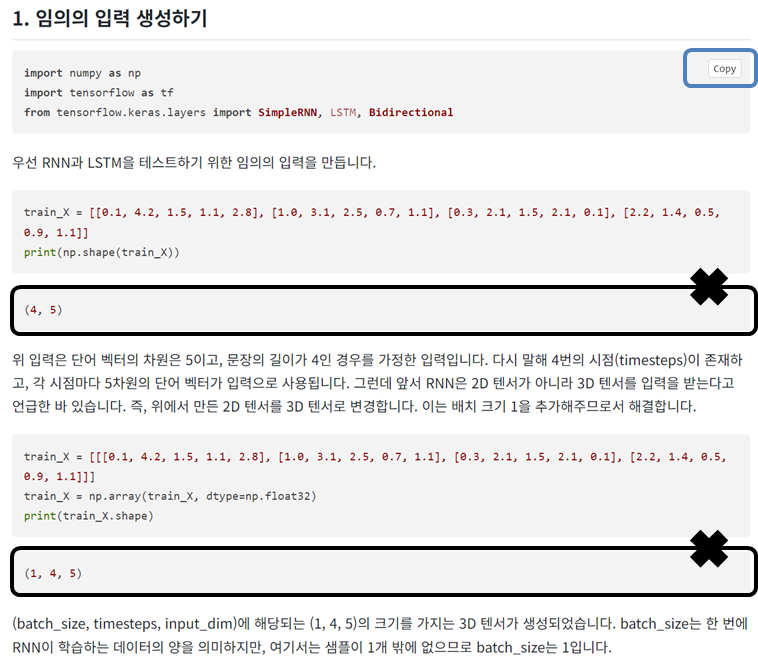

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [2]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


In [3]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)


(1, 4, 5)


In [4]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))


hidden state : [[ 0.1514578  -0.10609241  0.98653454]], shape: (1, 3)


In [5]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))


hidden states : [[[ 0.9699031  -0.9925192  -0.2915824 ]
  [ 0.14309949  0.5828617   0.05716022]
  [ 0.7950297  -0.73266804  0.7970885 ]
  [ 0.84108055  0.83013564 -0.8277891 ]]], shape: (1, 4, 3)


In [6]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))


hidden states : [[[-0.9937492  -0.86686397 -0.9997861 ]
  [-0.99722904 -0.7317222  -0.9994909 ]
  [-0.9821638  -0.9267946  -0.99945927]
  [-0.5790042   0.65404445 -0.98218995]]], shape: (1, 4, 3)
last hidden state : [[-0.5790042   0.65404445 -0.98218995]], shape: (1, 3)


In [7]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))


hidden state : [[-0.28466108  0.9877339  -0.10897473]], shape: (1, 3)
last hidden state : [[-0.28466108  0.9877339  -0.10897473]], shape: (1, 3)


In [8]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))


hidden state : [[ 0.40924323 -0.01174474 -0.35182473]], shape: (1, 3)
last hidden state : [[ 0.40924323 -0.01174474 -0.35182473]], shape: (1, 3)
last cell state : [[ 1.6190269  -0.09269124 -0.52667105]], shape: (1, 3)


In [9]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))


hidden states : [[[ 0.0697118  -0.12378315  0.01218386]
  [ 0.11091653 -0.14972284  0.04625869]
  [ 0.20320496 -0.26730472  0.18819718]
  [ 0.29872724 -0.19176072  0.09592632]]], shape: (1, 4, 3)
last hidden state : [[ 0.29872724 -0.19176072  0.09592632]], shape: (1, 3)
last cell state : [[ 0.39519903 -1.1772234   0.3462693 ]], shape: (1, 3)


In [10]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)


In [11]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))


hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


In [12]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)


In [13]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))


hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


# 구글 로그아웃 잘 하시기 바랍니다.